# Difference in Difference Deaths

In [44]:
import pandas as pd
import numpy as np
Deaths = pd.read_csv('deaths-pop-merge.csv')
Deaths

,Unnamed: 0,State,County,Year,Deaths,Population,Treatment,death_prop
0,0,Florida,Alachua,2003,11.0,225862.0,Treatment,0.000049
1,1,Florida,Alachua,2007,17.0,240196.0,Treatment,0.000071
2,2,Florida,Alachua,2009,15.0,243574.0,Treatment,0.000062
3,3,Florida,Alachua,2010,15.0,247336.0,Treatment,0.000061
4,4,Florida,Alachua,2011,14.0,249688.0,Treatment,0.000056
...,...,...,...,...,...,...,...,...
11462,6797,Arizona,Yuma,2011,20.0,202628.0,Control,0.000099
11463,6798,Arizona,Yuma,2012,32.0,202375.0,Control,0.000158
11464,6799,Arizona,Yuma,2013,22.0,202173.0,Control,0.000109
11465,6800,Arizona,Yuma,2014,35.0,203483.0,Control,0.000172


## For Florida

In [45]:
states=['Washington','Texas'] 
Floridadf=Deaths[~Deaths.State.isin(states)] # removing Washington and texas and keeping: Florida vs the rest of the country 
pre_FL=Floridadf[(Floridadf.State=='Florida')&(Floridadf.Year<2010)] # filtering for pre policy years for Florida 
post_FL=Floridadf[(Floridadf.State=='Florida')&(Floridadf.Year>=2010)] #post policy years for Florida
pre_contr=Floridadf[(Floridadf.Treatment=='Control')&(Floridadf.Year<2010)] # pre policy years for all the other control states 
post_contr=Floridadf[(Floridadf.Treatment=='Control')&(Floridadf.Year>=2010)] #post policy years for all the other control states


In [46]:
from plotnine import *
def diffIndiff(prepolicy_contr,postpolicy_contr,prepolicy_treatment,postpolicy_treatment,xvar,yvar,policyyear):
    m=(
    ggplot()
    # plot all chosen states,  pre policy year
    + geom_smooth(
        prepolicy_contr,
        aes(x=xvar, y=yvar,color="Treatment"),
        method="lm",
    )
    # plot all chosen states, post policy year
    + geom_smooth(
        postpolicy_contr,
        aes(x=xvar, y=yvar,color="Treatment"),
        method="lm",
    )
    # plot treatment, pre policy year
    + geom_smooth(
        prepolicy_treatment,
        aes(x=xvar, y=yvar, color="Treatment"),
        method="lm",
    )
    # plot treatment, post policy year
    + geom_smooth(
        postpolicy_treatment,
        aes(x=xvar, y=yvar, color="Treatment"),
        method="lm",
    )
    + geom_vline(xintercept=policyyear, linetype="dotted")
    + xlab("Year")
    + ylab("Mortality rate")
    + theme_classic(base_family="Times")
    + scale_x_continuous(breaks=[2003,2004,2005,2006, 2007,2008, 2009,2010,2011 ,2012,2013,2014], limits=[2003, 2014])
    )
    return m


/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Mortality-rate-FL.png


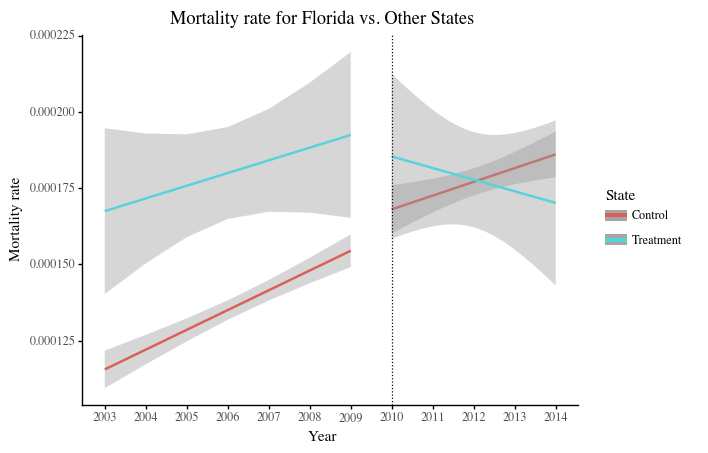

<ggplot: (307519507)>

In [47]:
m=diffIndiff(pre_contr,post_contr,pre_FL,post_FL,'Year','death_prop',2010)+ labs(title="Mortality rate for Florida vs. Other States", color="State")
ggsave(plot=m,filename='Mortality-rate-FL.png')
m

# Washington

In [48]:
states=['Florida','Texas']
Wadf=Deaths[~Deaths.State.isin(states)] # removing Florida and texas and keeping Washington vs the rest of the country 
pre_Wa=Wadf[(Wadf.State=='Washington')&(Wadf.Year<2012)]
post_Wa=Wadf[(Wadf.State=='Washington')&(Wadf.Year>=2012)]
pre_contr=Wadf[(Wadf.Treatment=='Control')&(Wadf.Year<2012)]
post_contr=Wadf[(Wadf.Treatment=='Control')&(Wadf.Year>=2012)]


/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Mortality-rate-Wa.png


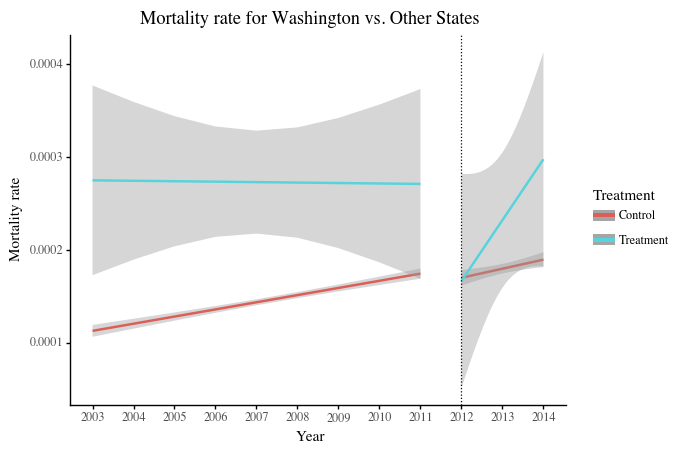

<ggplot: (306147503)>

In [49]:
m=diffIndiff(pre_contr,post_contr,pre_Wa,post_Wa,'Year','death_prop',2012)+ labs(title="Mortality rate for Washington vs. Other States", color="Treatment")
ggsave(plot=m,filename='Mortality-rate-Wa.png')
m

## Texas

In [50]:
states=['Florida','Washington']
Txdf=Deaths[~Deaths.State.isin(states)] # removing Florida and Washington and keeping Washington vs the rest of the country 
pre_Tx=Txdf[(Txdf.State=='Texas')&(Txdf.Year<2007)]
post_Tx=Txdf[(Txdf.State=='Texas')&(Txdf.Year>=2007)]
pre_contr=Txdf[(Txdf.Treatment=='Control')&(Txdf.Year<2007)]
post_contr=Txdf[(Txdf.Treatment=='Control')&(Txdf.Year>=2007)]


/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/Users/marlynehakizimana/opt/miniconda3/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Mortality-rate-Tx.png


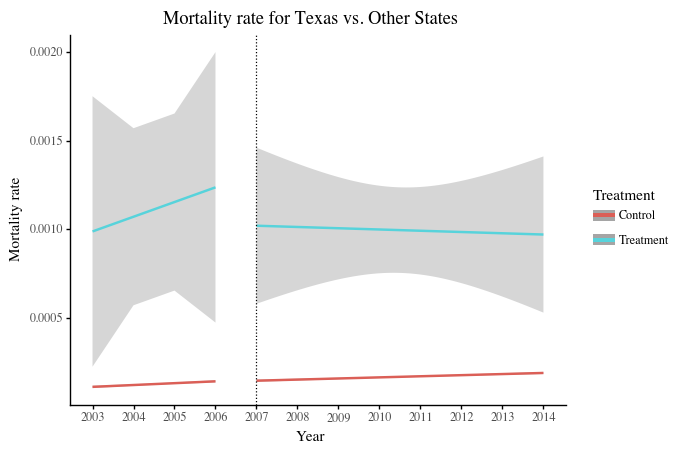

<ggplot: (297536642)>

In [51]:
m=diffIndiff(pre_contr,post_contr,pre_Tx,post_Tx,'Year','death_prop',2007)+ labs(title="Mortality rate for Texas vs. Other States", color="Treatment")
ggsave(plot=m,filename='Mortality-rate-Tx.png') #saves it as a png 
m